In [1]:
# Import the pandas library with the alias 'pd'
import pandas as pd

# Load the uploaded CSV file for clustering
csv_file_path = 'Tabel_Harga.csv'
data = pd.read_csv(csv_file_path)

# Display the first few rows of the data to understand its structure
data.head()

,No;Beras;14,05;14,05;13,95;14,1;14,1;14.1,15;14,2;14,2;14.1,1;14.2,...,3;15.1,35;15,35;15.1,35;15.2,35;15.3,4;15,4;-;-;15,4;15.1,4;15.2,4
0,1;Beras Kualitas Bawah I;12,85;12,85;12,75;12,9;12,9;12,95;13;13;12,9;12,9;12,9;12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2;Beras Kualitas Bawah II;11,95;11,95;11,85;12;12;12,05;12,1;12,1;12;12;12;12;12,1;12,1;12,1;12,...,4;-;-;13,4;13,4;13,4,NaN,NaN,NaN,NaN,NaN,NaN
2,3;Beras Kualitas Medium I;14,5;14,5;14,45;14,55;14,55;14,6;14,65;14,65;14,55;14,...,55;15,6;15,6;15,6;15,6;15,6;-;-;15,6;15,6;15,6.0,NaN
3,4;Beras Kualitas Medium II;13,45;13,45;13,4;13,5;13,5;13,55;13,6;13,6;13,5;13,...,6;14,6;14,6;14,6;-;-;14,6;14,6;14,6,NaN,NaN,NaN
4,5;Beras Kualitas Super I;16,8;16,8;16,55;16,8;16,8;16,9;16,95;16,95;16,85;16,...,45;18,45;-;-;18,45;18,45;18,45,NaN,NaN,NaN,NaN,NaN


In [2]:
!pip install scikit-learn pandas matplotlib

<ipython-input-7-d8b973e561ab>:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_numeric = data_numeric.replace('-', float('nan'))
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['-' '-.1' '-.2' '-.3']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


Cluster Centers: 
 [[0.31958763 0.31958763 0.34042553 0.32291667 0.32291667 0.32164948
  0.32164948 0.32164948 0.32164948 0.32164948 0.32164948 0.32164948
  0.3257732  0.3257732  0.3257732  0.3257732  0.3257732  0.3257732
  0.32989691 0.32989691 0.3257732  0.3257732  0.32783505 0.32783505
  0.32783505 0.3244898  0.32040816 0.32040816 0.32040816 0.32244898
  0.32244898 0.32244898 0.32244898 0.32244898 0.31836735 0.312
  0.312      0.312      0.312      0.312      0.312      0.312
  0.312      0.31836735 0.32244898 0.32244898 0.32653061 0.32653061
  0.32653061 0.32653061 0.32244898 0.32244898 0.32653061 0.32653061
  0.32653061 0.32653061 0.32653061 0.32653061 0.32653061 0.32653061
  0.31836735 0.31836735 0.31836735 0.33978495 0.31836735 0.31836735
  0.31836735 0.31836735 0.31836735 0.31836735 0.31836735 0.3
  0.31836735 0.31836735 0.31836735 0.31836735 0.31836735 0.31836735
  0.31836735 0.31836735 0.31836735 0.33673469 0.30204082 0.30204082
  0.30204082 0.30204082 0.30204082 0.30204082 0

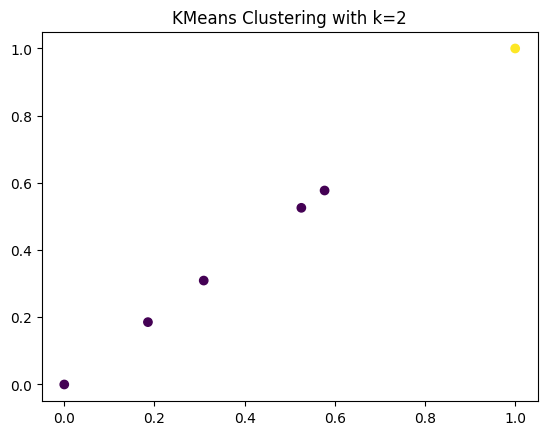

In [7]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer # Import SimpleImputer from the correct module
import matplotlib.pyplot as plt
# Load your data, specifying the delimiter and decimal separator
data = pd.read_csv('Tabel_Harga.csv', delimiter=';', decimal=',')

# Preprocessing: Remove non-numeric columns or handle them appropriately
# Assuming 'No' and 'Beras' are non-numeric, drop them
data_numeric = data.drop(columns=['No', 'Beras'])

# Replace hyphens with NaN to represent missing values
data_numeric = data_numeric.replace('-', float('nan'))

# Handle missing values (e.g., drop or fill NaNs)
imputer = SimpleImputer(strategy='mean')  # Impute missing values with the mean
data_numeric_imputed = imputer.fit_transform(data_numeric)

# Convert imputed data back into a DataFrame, but use the imputed data's columns
# This ensures the number of columns matches
data_numeric = pd.DataFrame(data_numeric_imputed, columns=[f'Column_{i}' for i in range(data_numeric_imputed.shape[1])])
# Alternatively, if you want to keep track of the original column names that weren't dropped:
# kept_columns = data_numeric.columns[~data_numeric.isna().all()] # Get columns without all NaNs
# data_numeric = pd.DataFrame(data_numeric_imputed, columns=kept_columns[:data_numeric_imputed.shape[1]])

# Standardize the data with MinMaxScaler (ensures values are between 0 and 1, no negatives)
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_numeric)

# Perform KMeans clustering with k=2
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_scaled)

# Add cluster labels to the original DataFrame
data['Cluster'] = kmeans.labels_

# Print cluster centroids (adjusted for non-negative scaling)
print("Cluster Centers: \n", kmeans.cluster_centers_)

# Display the first 5 rows of the clustered data
print(data.head(5))

# Visualizing the clusters (optional, if your data has two features)
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('KMeans Clustering with k=2')
plt.show()

# Save the clustered data to a new CSV file (first 5 rows only)
data.head(5).to_csv('clustered_data_k2_top5.csv', index=False)

In [2]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 11.2 MB/s eta 0:00:00


In [51]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score
import skfuzzy as fuzz

# Load your data, specifying the delimiter and decimal separator
try:
    data = pd.read_csv('Tabel_Harga.csv', delimiter=';', decimal=',')
except Exception as e:
    print(f"Error loading data: {e}")
    exit()

# Preprocessing: Remove non-numeric columns or handle them appropriately
data_numeric = data.drop(columns=['No', 'Beras'], errors='ignore')

# Replace hyphens with NaN to represent missing values
data_numeric.replace('-', float('nan'), inplace=True)

# Ensure all columns are numeric; if not, drop those with only NaNs
data_numeric = data_numeric.apply(pd.to_numeric, errors='coerce')  # Convert to numeric, coercing errors
data_numeric = data_numeric.dropna(axis=1, how='all')  # Drop columns with all NaNs

# Handle missing values (e.g., drop or fill NaNs)
imputer = SimpleImputer(strategy='mean')  # Impute missing values with the mean
data_numeric_imputed = imputer.fit_transform(data_numeric)

# Convert imputed data back into a DataFrame with the correct columns
data_numeric = pd.DataFrame(data_numeric_imputed, columns=data_numeric.columns)

# Standardize the data with MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_numeric)

# ---------------------------------------
# KMeans Clustering with k=2
# ---------------------------------------
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_scaled)

# Compute silhouette score for KMeans
silhouette_kmeans = silhouette_score(data_scaled, kmeans.labels_)
print(f"KMeans Silhouette Score (k=2): {silhouette_kmeans}")

# ---------------------------------------
# Fuzzy C-Means Clustering with k=2
# ---------------------------------------
cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(
    data_scaled.T,
    c=2,           # Number of clusters
    m=2.0,         # Fuzziness parameter
    error=0.005,   # Stopping criterion
    maxiter=1000,  # Maximum number of iterations
    init=None,     # Initial guess for membership
    seed=42
)

# Assign the cluster with the highest membership probability
cluster_membership = u.argmax(axis=0)

# Compute silhouette score for Fuzzy C-Means
silhouette_fcm = silhouette_score(data_scaled, cluster_membership)
print(f"Fuzzy C-Means Silhouette Score (k=2): {silhouette_fcm} \n\n")



KMeans Silhouette Score (k=2): 0.4315669239671558
Fuzzy C-Means Silhouette Score (k=2): 0.49387781357297894 




<ipython-input-51-7955a54c963d>:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_numeric.replace('-', float('nan'), inplace=True)


In [53]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score
import skfuzzy as fuzz

# Load your data, specifying the delimiter and decimal separator
try:
    data = pd.read_csv('Tabel_Harga.csv', delimiter=';', decimal=',')
except Exception as e:
    print(f"Error loading data: {e}")
    exit()

# Preprocessing: Remove non-numeric columns or handle them appropriately
data_numeric = data.drop(columns=['No', 'Beras'], errors='ignore')

# Replace hyphens with NaN to represent missing values
data_numeric.replace('-', float('nan'), inplace=True)

# Ensure all columns are numeric; if not, drop those with only NaNs
data_numeric = data_numeric.apply(pd.to_numeric, errors='coerce')  # Convert to numeric, coercing errors
data_numeric = data_numeric.dropna(axis=1, how='all')  # Drop columns with all NaNs

# Handle missing values (e.g., drop or fill NaNs)
imputer = SimpleImputer(strategy='mean')  # Impute missing values with the mean
data_numeric_imputed = imputer.fit_transform(data_numeric)

# Convert imputed data back into a DataFrame with the correct columns
data_numeric = pd.DataFrame(data_numeric_imputed, columns=data_numeric.columns)

# Standardize the data with MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_numeric)

# ---------------------------------------
# KMeans Clustering with k=2
# ---------------------------------------
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

# Compute silhouette score for KMeans
silhouette_kmeans = silhouette_score(data_scaled, kmeans.labels_)
print(f"KMeans Silhouette Score (k=3): {silhouette_kmeans}")

# ---------------------------------------
# Fuzzy C-Means Clustering with k=2
# ---------------------------------------
cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(
    data_scaled.T,
    c=3,           # Number of clusters
    m=2.0,         # Fuzziness parameter
    error=0.005,   # Stopping criterion
    maxiter=1000,  # Maximum number of iterations
    init=None,     # Initial guess for membership
    seed=42
)

# Assign the cluster with the highest membership probability
cluster_membership = u.argmax(axis=0)

# Compute silhouette score for Fuzzy C-Means
silhouette_fcm = silhouette_score(data_scaled, cluster_membership)
print(f"Fuzzy C-Means Silhouette Score (k=3): {silhouette_fcm} \n\n")


KMeans Silhouette Score (k=3): 0.25797541713406474
Fuzzy C-Means Silhouette Score (k=3): 0.4967427520467019 




<ipython-input-53-f8871f715818>:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_numeric.replace('-', float('nan'), inplace=True)


In [54]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score
import skfuzzy as fuzz

# Load your data, specifying the delimiter and decimal separator
try:
    data = pd.read_csv('Tabel_Harga.csv', delimiter=';', decimal=',')
except Exception as e:
    print(f"Error loading data: {e}")
    exit()

# Preprocessing: Remove non-numeric columns or handle them appropriately
data_numeric = data.drop(columns=['No', 'Beras'], errors='ignore')

# Replace hyphens with NaN to represent missing values
data_numeric.replace('-', float('nan'), inplace=True)

# Ensure all columns are numeric; if not, drop those with only NaNs
data_numeric = data_numeric.apply(pd.to_numeric, errors='coerce')  # Convert to numeric, coercing errors
data_numeric = data_numeric.dropna(axis=1, how='all')  # Drop columns with all NaNs

# Handle missing values (e.g., drop or fill NaNs)
imputer = SimpleImputer(strategy='mean')  # Impute missing values with the mean
data_numeric_imputed = imputer.fit_transform(data_numeric)

# Convert imputed data back into a DataFrame with the correct columns
data_numeric = pd.DataFrame(data_numeric_imputed, columns=data_numeric.columns)

# Standardize the data with MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_numeric)

# ---------------------------------------
# KMeans Clustering with k=4
# ---------------------------------------
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data_scaled)

# Compute silhouette score for KMeans
silhouette_kmeans = silhouette_score(data_scaled, kmeans.labels_)
print(f"KMeans Silhouette Score (k=3): {silhouette_kmeans}")

# ---------------------------------------
# Fuzzy C-Means Clustering with k=2
# ---------------------------------------
cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(
    data_scaled.T,
    c=4,           # Number of clusters
    m=2.0,         # Fuzziness parameter
    error=0.005,   # Stopping criterion
    maxiter=1000,  # Maximum number of iterations
    init=None,     # Initial guess for membership
    seed=42
)

# Assign the cluster with the highest membership probability
cluster_membership = u.argmax(axis=0)

# Compute silhouette score for Fuzzy C-Means
silhouette_fcm = silhouette_score(data_scaled, cluster_membership)
print(f"Fuzzy C-Means Silhouette Score (k=4): {silhouette_fcm} \n\n")


KMeans Silhouette Score (k=3): 0.3866400166087951
Fuzzy C-Means Silhouette Score (k=4): 0.3866400166087951 




<ipython-input-54-0a44999b9b34>:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_numeric.replace('-', float('nan'), inplace=True)


In [76]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score
import skfuzzy as fuzz

# Load your data, specifying the delimiter and decimal separator
try:
    data = pd.read_csv('Tabel_Harga.csv', delimiter=';', decimal=',')
except Exception as e:
    print(f"Error loading data: {e}")
    exit()

# Preprocessing: Remove non-numeric columns or handle them appropriately
data_numeric = data.drop(columns=['No', 'Beras'], errors='ignore')

# Replace hyphens with NaN to represent missing values
data_numeric.replace('-', float('nan'), inplace=True)

# Ensure all columns are numeric; if not, drop those with only NaNs
data_numeric = data_numeric.apply(pd.to_numeric, errors='coerce')  # Convert to numeric, coercing errors
data_numeric = data_numeric.dropna(axis=1, how='all')  # Drop columns with all NaNs

# Handle missing values (e.g., drop or fill NaNs)
imputer = SimpleImputer(strategy='mean')  # Impute missing values with the mean
data_numeric_imputed = imputer.fit_transform(data_numeric)

# Convert imputed data back into a DataFrame with the correct columns
data_numeric = pd.DataFrame(data_numeric_imputed, columns=data_numeric.columns)

# Standardize the data with MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_numeric)

# ---------------------------------------
# KMeans Clustering with k=4
# ---------------------------------------
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(data_scaled)

# Compute silhouette score for KMeans
silhouette_kmeans = silhouette_score(data_scaled, kmeans.labels_)
print(f"KMeans Silhouette Score (k=5): {silhouette_kmeans}")

# ---------------------------------------
# Fuzzy C-Means Clustering with k=2
# ---------------------------------------
cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(
    data_scaled.T,
    c=5,           # Number of clusters
    m=2.0,         # Fuzziness parameter
    error=0.005,   # Stopping criterion
    maxiter=1000,  # Maximum number of iterations
    init=None,     # Initial guess for membership
    seed=42
)

# Assign the cluster with the highest membership probability
cluster_membership = u.argmax(axis=0)

# Compute silhouette score for Fuzzy C-Means
silhouette_fcm = silhouette_score(data_scaled, cluster_membership)
print(f"Fuzzy C-Means Silhouette Score (k=5): {silhouette_fcm} \n\n")


KMeans Silhouette Score (k=5): 0.2373093108780111
Fuzzy C-Means Silhouette Score (k=5): 0.2373093108780111 




<ipython-input-76-46d371c0cf4c>:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_numeric.replace('-', float('nan'), inplace=True)


In [74]:
# ---------------------------------------
# KMeans Clustering
# ---------------------------------------
# Ensure n_clusters is less than the number of samples
n_clusters = min(6, data_scaled.shape[0] - 1)  # Changed to ensure n_clusters < n_samples
#n_clusters = 3 # You can also set manually number of clusters, based on your dataset insights
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(data_scaled)

# Compute silhouette score for KMeans
# Only calculate if n_clusters is valid
if 1 < n_clusters < data_scaled.shape[0]:
    silhouette_kmeans = silhouette_score(data_scaled, kmeans.labels_)
    print(f"KMeans Silhouette Score : {silhouette_kmeans}")
else:
    print(f"Cannot compute silhouette score for: Number of clusters should be between 2 and n_samples - 1.")


# ---------------------------------------
# Fuzzy C-Means Clustering
# ---------------------------------------
# Ensure n_clusters is less than the number of samples
n_clusters_fcm = min(6, data_scaled.shape[0] - 1) # Changed to ensure n_clusters < n_samples
#n_clusters_fcm = 3 # You can also set manually number of clusters, based on your dataset insights
cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(
    data_scaled.T,
    c=n_clusters_fcm,           # Number of clusters
    m=2.0,         # Fuzziness parameter
    error=0.005,   # Stopping criterion
    maxiter=1000,  # Maximum number of iterations
    init=None,     # Initial guess for membership
    seed=42
)

# Assign the cluster with the highest membership probability
cluster_membership = u.argmax(axis=0)

# Compute silhouette score for Fuzzy C-Means
# Only calculate if n_clusters is valid
if 1 < n_clusters_fcm < data_scaled.shape[0]:
    silhouette_fcm = silhouette_score(data_scaled, cluster_membership)
    print(f"Fuzzy C-Means Silhouette Score : {silhouette_fcm} \n\n")
else:
    print(f"Cannot compute silhouette score for k={n_clusters_fcm}: Number of clusters should be between 2 and n_samples - 1.")

KMeans Silhouette Score : 0.2373093108780111
Fuzzy C-Means Silhouette Score : 0.2373093108780111 




In [77]:
# ---------------------------------------
# KMeans Clustering
# ---------------------------------------
# Ensure n_clusters is less than the number of samples
n_clusters = min(7, data_scaled.shape[0] - 1)  # Changed to ensure n_clusters < n_samples
#n_clusters = 3 # You can also set manually number of clusters, based on your dataset insights
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(data_scaled)

# Compute silhouette score for KMeans
# Only calculate if n_clusters is valid
if 1 < n_clusters < data_scaled.shape[0]:
    silhouette_kmeans = silhouette_score(data_scaled, kmeans.labels_)
    print(f"KMeans Silhouette Score : {silhouette_kmeans}")
else:
    print(f"Cannot compute silhouette score for: Number of clusters should be between 2 and n_samples - 1.")


# ---------------------------------------
# Fuzzy C-Means Clustering
# ---------------------------------------
# Ensure n_clusters is less than the number of samples
n_clusters_fcm = min(7, data_scaled.shape[0] - 1) # Changed to ensure n_clusters < n_samples
#n_clusters_fcm = 3 # You can also set manually number of clusters, based on your dataset insights
cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(
    data_scaled.T,
    c=n_clusters_fcm,           # Number of clusters
    m=2.0,         # Fuzziness parameter
    error=0.005,   # Stopping criterion
    maxiter=1000,  # Maximum number of iterations
    init=None,     # Initial guess for membership
    seed=42
)

# Assign the cluster with the highest membership probability
cluster_membership = u.argmax(axis=0)

# Compute silhouette score for Fuzzy C-Means
# Only calculate if n_clusters is valid
if 1 < n_clusters_fcm < data_scaled.shape[0]:
    silhouette_fcm = silhouette_score(data_scaled, cluster_membership)
    print(f"Fuzzy C-Means Silhouette Score : {silhouette_fcm} \n\n")
else:
    print(f"Cannot compute silhouette score for k={n_clusters_fcm}: Number of clusters should be between 2 and n_samples - 1.")

KMeans Silhouette Score : 0.2373093108780111
Fuzzy C-Means Silhouette Score : 0.2373093108780111 




<ipython-input-78-a1546db88405>:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_numeric.replace('-', float('nan'), inplace=True)


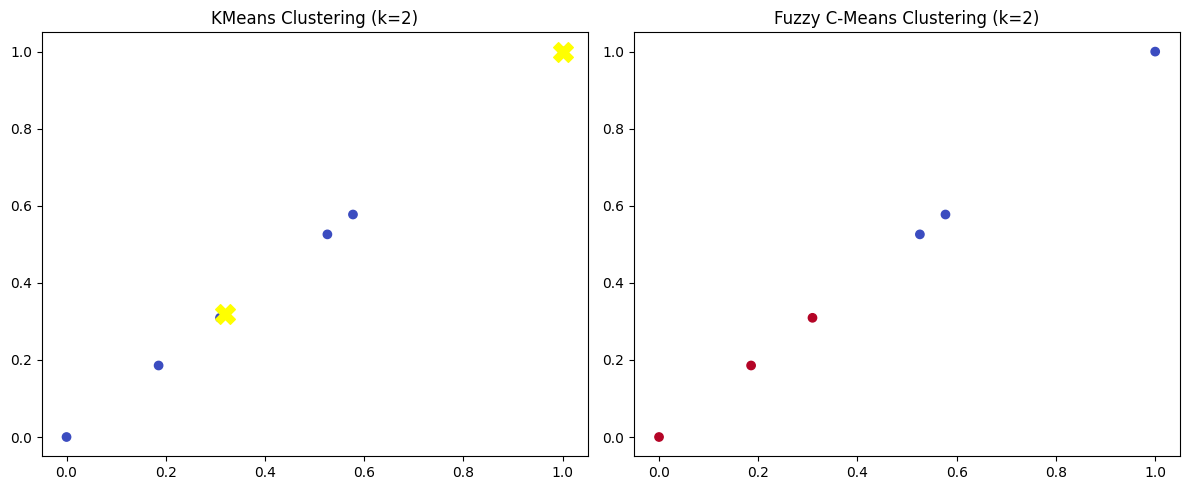

Comparison of KMeans and Fuzzy C-Means Clustering:

KMeans Silhouette Score: 0.4315669239671558
Fuzzy C-Means Silhouette Score: 0.49387781357297894

KMeans Execution Time: 0.0110 seconds
Fuzzy C-Means Execution Time: 0.0277 seconds



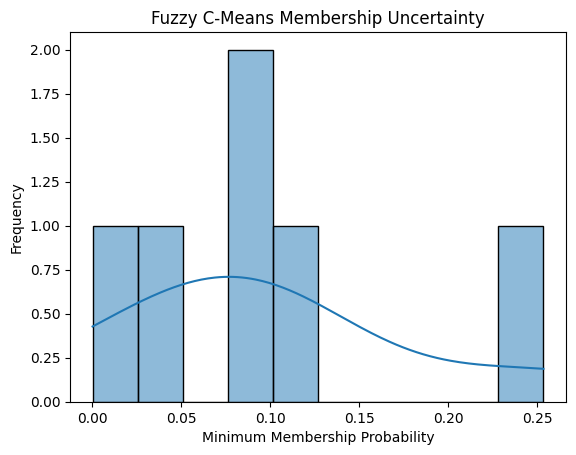

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score
import skfuzzy as fuzz

# Load your data, specifying the delimiter and decimal separator
try:
    data = pd.read_csv('Tabel_Harga.csv', delimiter=';', decimal=',')
except Exception as e:
    print(f"Error loading data: {e}")
    exit()

# Preprocessing: Remove non-numeric columns or handle them appropriately
data_numeric = data.drop(columns=['No', 'Beras'], errors='ignore')

# Replace hyphens with NaN to represent missing values
data_numeric.replace('-', float('nan'), inplace=True)

# Ensure all columns are numeric; if not, drop those with only NaNs
data_numeric = data_numeric.apply(pd.to_numeric, errors='coerce')
data_numeric = data_numeric.dropna(axis=1, how='all')

# Handle missing values (e.g., drop or fill NaNs)
imputer = SimpleImputer(strategy='mean')
data_numeric_imputed = imputer.fit_transform(data_numeric)
data_numeric = pd.DataFrame(data_numeric_imputed, columns=data_numeric.columns)

# Standardize the data with MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_numeric)

# ---------------------------------------
# KMeans Clustering with k=2
# ---------------------------------------
start_time_kmeans = time.time()
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_scaled)
end_time_kmeans = time.time()

# Compute silhouette score for KMeans
silhouette_kmeans = silhouette_score(data_scaled, kmeans.labels_)

# ---------------------------------------
# Fuzzy C-Means Clustering with k=2
# ---------------------------------------
start_time_fcm = time.time()
cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(
    data_scaled.T,
    c=2,
    m=2.0,
    error=0.005,
    maxiter=1000,
    init=None,
    seed=42
)
end_time_fcm = time.time()

# Assign the cluster with the highest membership probability
cluster_membership = u.argmax(axis=0)

# Compute silhouette score for Fuzzy C-Means
silhouette_fcm = silhouette_score(data_scaled, cluster_membership)

# ---------------------------------------
# Visual Comparison
# ---------------------------------------
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# KMeans plot
ax[0].scatter(data_scaled[:, 0], data_scaled[:, 1], c=kmeans.labels_, cmap='coolwarm')
ax[0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='yellow', marker='X')
ax[0].set_title('KMeans Clustering (k=2)')

# Fuzzy C-Means plot
ax[1].scatter(data_scaled[:, 0], data_scaled[:, 1], c=cluster_membership, cmap='coolwarm')
ax[1].set_title('Fuzzy C-Means Clustering (k=2)')

plt.tight_layout()
plt.show()

# ---------------------------------------
# Comparison of Execution Time and Scores
# ---------------------------------------
execution_time_kmeans = end_time_kmeans - start_time_kmeans
execution_time_fcm = end_time_fcm - start_time_fcm

print("Comparison of KMeans and Fuzzy C-Means Clustering:\n")
print(f"KMeans Silhouette Score: {silhouette_kmeans}")
print(f"Fuzzy C-Means Silhouette Score: {silhouette_fcm}\n")

print(f"KMeans Execution Time: {execution_time_kmeans:.4f} seconds")
print(f"Fuzzy C-Means Execution Time: {execution_time_fcm:.4f} seconds\n")

# ---------------------------------------
# Fuzzy Membership Uncertainty
# ---------------------------------------
membership_uncertainty = np.min(u, axis=0)
sns.histplot(membership_uncertainty, bins=10, kde=True)
plt.title('Fuzzy C-Means Membership Uncertainty')
plt.xlabel('Minimum Membership Probability')
plt.ylabel('Frequency')
plt.show()
